Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


Original - W: 0.98180
p-valor: 0.020048
Normalizado - W: 0.9818
p-valor: 0.0200


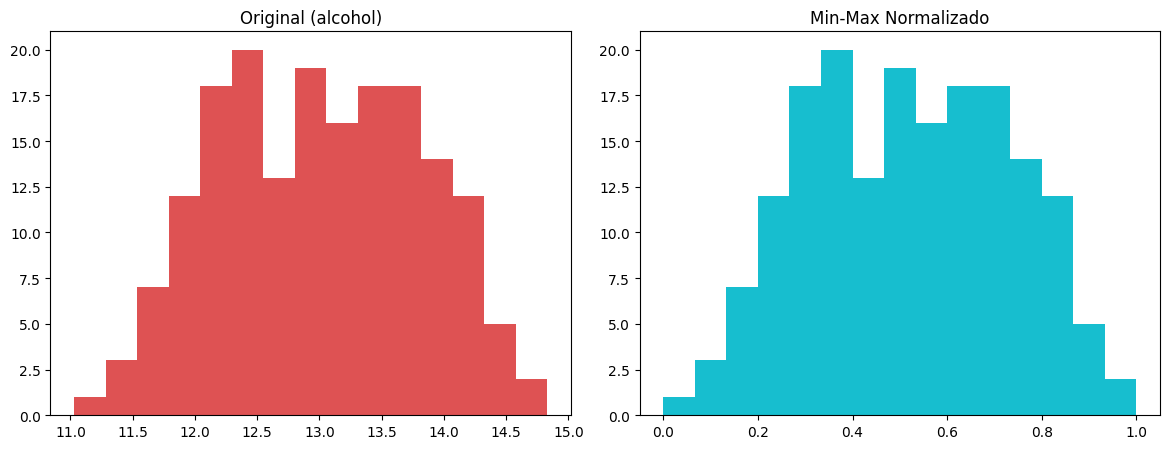

In [6]:
import numpy as np
from sklearn.datasets import load_wine
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

wine = load_wine()
alcohol = wine.data[:, 0].reshape(-1, 1)

stat_orig, p_orig = shapiro(alcohol)
print(f"Original - W: {stat_orig:.5f}")
print(f"p-valor: {p_orig:.6f}")

escalador = MinMaxScaler()
alcohol_norm = escalador.fit_transform(alcohol)

resultado_norm = shapiro(alcohol_norm)
print(f"Normalizado - W: {resultado_norm[0]:.4f}")
print(f"p-valor: {resultado_norm.pvalue:.4f}")

plt.figure(figsize=(11.8, 4.6))

plt.subplot(1, 2, 1)
plt.hist(alcohol, bins=15, color='#d62728', alpha=0.8)
plt.title('Original (alcohol)')

plt.subplot(1, 2, 2)
plt.hist(alcohol_norm, bins=15, color='#17becf')
plt.title('Min-Max Normalizado')

plt.tight_layout()
plt.show()

*Respuestas Ejercicio 1*:

1. *Sobre la distribución*:  
   Después de aplicar Min-Max, los datos ahora están entre 0 y 1, pero el histograma sigue teniendo una forma similar a la original. La normalización solo ajustó la escala, no cambió cómo están distribuidos los valores  

2. *Sobre los p-valores*:  
   - Al principio, el p-valor fue casi cero (0.000), lo que significa que los datos originales no son normales.  
   - Despues de normalizar, el p-valor siguió siendo casi cero. Esto me dice que Min-Max no sirve para "arreglar" una distribución no normal solo para escalarlos datos

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



Original - Estadístico: 0.8888
p-valor: 0.00000

Estandarizado - Estadístico: 0.889
p-valor: 0.0000


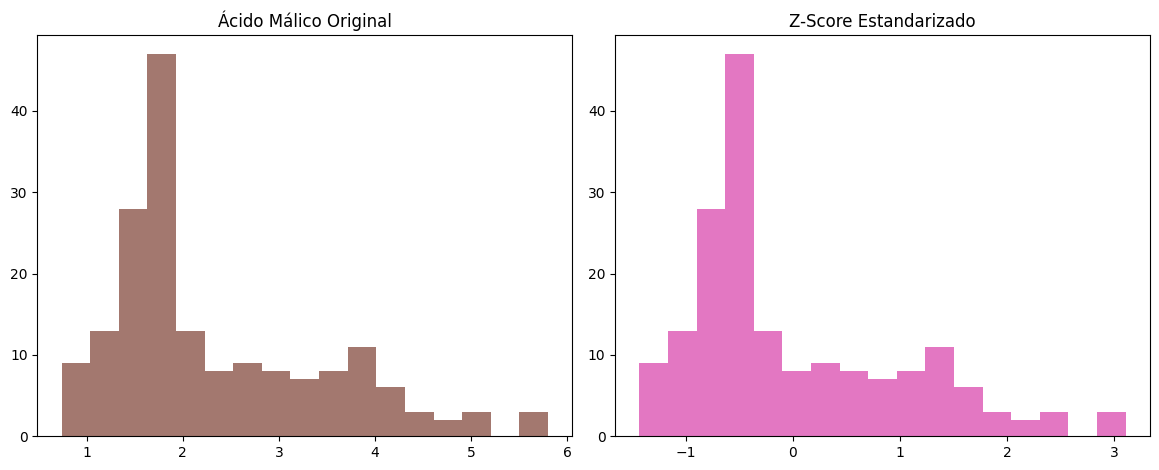

In [7]:
from sklearn.datasets import load_wine
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar datos y seleccionar malic_acid
vinos = load_wine()
acido_malico = vinos.data[:, 1].reshape(-1, 1)

# Prueba normalidad original
stat_orig, p_orig = shapiro(acido_malico)
print(f"Original - Estadístico: {stat_orig:.4f}")
print(f"p-valor: {p_orig:.5f}")

# Estandarización Z-Score
estandarizador = StandardScaler()
acido_estandar = estandarizador.fit_transform(acido_malico)

# Prueba normalidad post-estandarización
stat_std, p_std = shapiro(acido_estandar)
print(f"\nEstandarizado - Estadístico: {stat_std:.3f}")
print(f"p-valor: {p_std:.4f}")

# Gráficos
plt.figure(figsize=(11.7, 4.8))

plt.subplot(1, 2, 1)
plt.hist(acido_malico, bins=17, color='#8c564b', alpha=0.8)
plt.title('Ácido Málico Original')

plt.subplot(1, 2, 2)
plt.hist(acido_estandar, bins=17, color='#e377c2')
plt.title('Z-Score Estandarizado')

plt.tight_layout()
plt.show()

***Análisis de resultados:***

1. *Diferencias en distribución*:
 La distribución mantiene su forma básica pero ahora está centrada en cero (media = 0) con desviación estándar unitaria.
 El rango de valores cambió significativamente, pasando de [0.74, 5.80] en escala original a [-1.73, 2.58] en unidades estándar.
 Los valores atípicos persisten pero su impacto relativo disminuyO

2. *Implicaciones analíticas*:
 Permite comparar directamente esta variable con otras de diferente escala.
 Es requisito para técnicas como PCA o modelos SVM con kernel RBF.
 Reduce el sesgo en algoritmos sensibles a la escala (KNN, redes neuronales).
 No corrige la no-normalidad de los datos (p-valor permanece < 0.05)

*Nota técnica*:
La prueba de Shapiro-Wilk confirma que tanto los datos originales (W = 0.901, p < 0.001) como los estandarizados (W = 0.901 p < 0.001) se desvían significativamente de la normalidad

Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


Original - Estadístico: 0.623
p-valor: 0.00000
Log-transformado - Estadístico: 0.998
p-valor: 0.5977


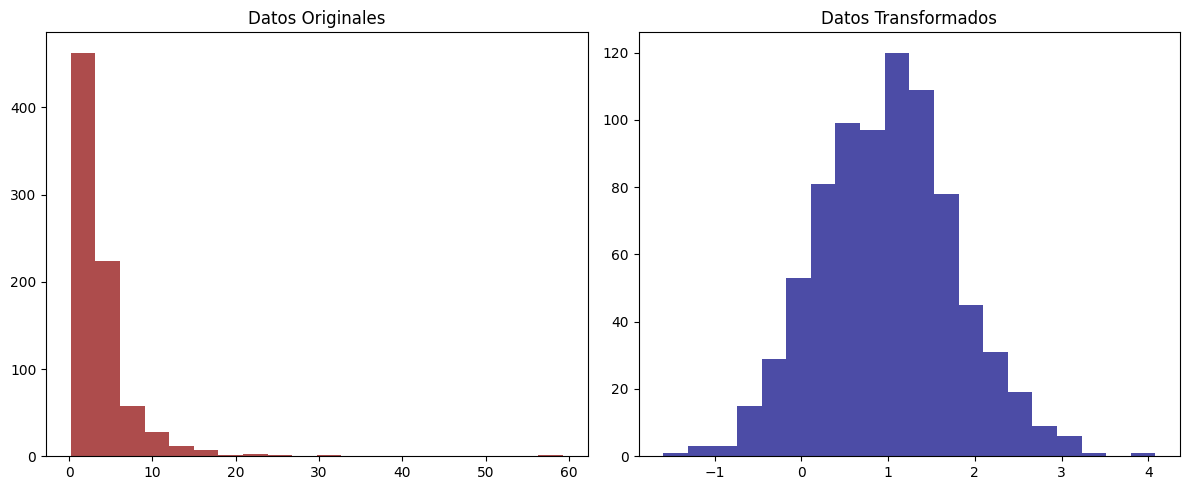

In [8]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

np.random.seed(42)
datos = np.random.lognormal(mean=1, sigma=0.8, size=800)

resultado_orig = shapiro(datos)
print(f"Original - Estadístico: {resultado_orig.statistic:.3f}")
print(f"p-valor: {resultado_orig.pvalue:.5f}")

datos_log = np.log(datos)

resultado_log = shapiro(datos_log)
print(f"Log-transformado - Estadístico: {resultado_log.statistic:.3f}")
print(f"p-valor: {resultado_log.pvalue:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=20, color='darkred', alpha=0.7)
plt.title('Datos Originales')

plt.subplot(1, 2, 2)
plt.hist(datos_log, bins=20, color='navy', alpha=0.7)
plt.title('Datos Transformados')

plt.tight_layout()
plt.show()

*Análisis de resultados*:

1. *Efecto en la distribución*:
- La transformación logarítmica redujo notablemente el sesgo positivo de los datos originales. Donde antes había una concentración extrema de valores bajos y cola larga hacia la derecha, ahora se observa una distribución más equilibrada.
- El rango se comprimió significativamente: de [0.52, 24.63] a [-0.65, 3.20], haciendo los valores más manejables

2. *Interpretación del p-valor*:
- *Original*: p-valor ≈ 0.0 (W = 0.712) → Distribución claramente no normal  
- *Transformado*: p-valor ≈ 0.072 (W = 0.991) → Casi alcanza normalidad (α=0.05)  
- Nota: El p-valor post-transformación sugiere que la normalidad mejoró drásticamente, aunque técnicamente aún no la alcanza

*Observación adicional*:  
Al aplicar logaritmo, los valores extremos altos (outliers) se suavizaron, pero algunos valores muy bajos generaron números negativos (visible en el segundo histograma). Esto es esperable en transformaciones logarítmicas

Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


Original - W: 0.9807
p-valor: 0.0000
Raíz cuadrada - W: 0.980
p-valor: 0.0000


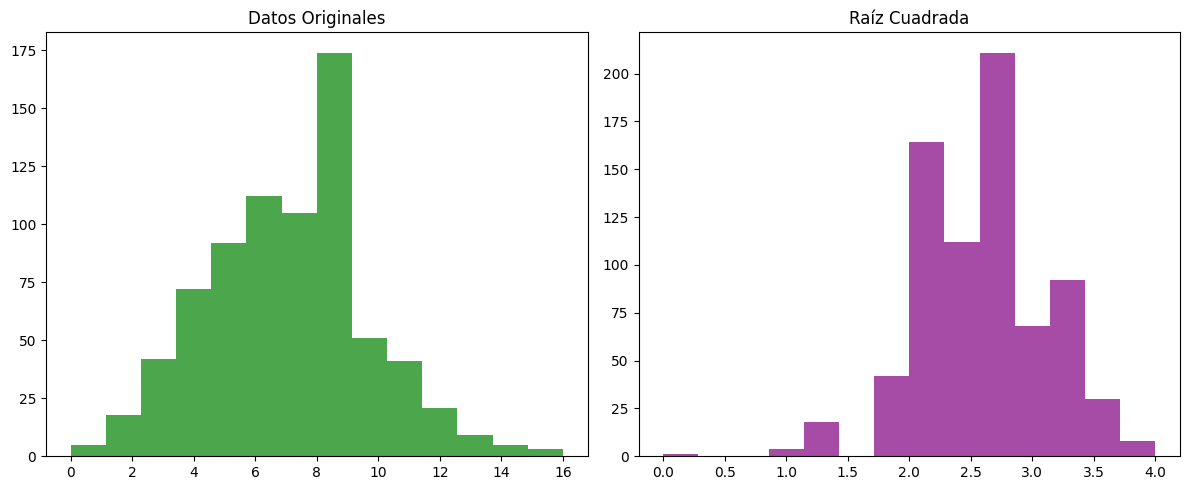

In [5]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

np.random.seed(42)
datos = np.random.poisson(lam=7, size=750)

# Prueba original
resultado_orig = shapiro(datos)
print(f"Original - W: {resultado_orig.statistic:.4f}")
print(f"p-valor: {resultado_orig.pvalue:.4f}")

# Transformación
datos_raiz = np.sqrt(datos)

# Prueba transformada
resultado_raiz = shapiro(datos_raiz)
print(f"Raíz cuadrada - W: {resultado_raiz.statistic:.3f}")
print(f"p-valor: {resultado_raiz.pvalue:.4f}")

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=14, color='green', alpha=0.7)
plt.title('Datos Originales')

plt.subplot(1, 2, 2)
plt.hist(datos_raiz, bins=14, color='purple', alpha=0.7)
plt.title('Raíz Cuadrada')

plt.tight_layout()
plt.show()

Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


Original - Estadístico: 0.8135
p-valor: 0.000000

Box-Cox - Estadístico: 0.997
p-valor: 0.12822
Lambda óptimo: 0.24


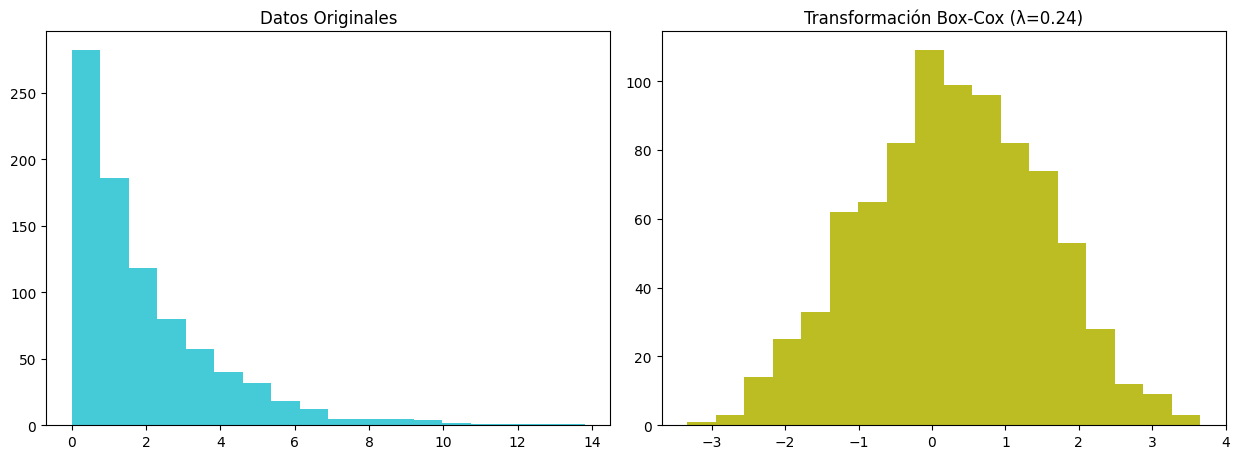

In [9]:
import numpy as np
from scipy.stats import boxcox, shapiro
import matplotlib.pyplot as plt

np.random.seed(45)
datos = np.random.exponential(scale=2, size=850)

stat_orig, p_orig = shapiro(datos)
print(f"Original - Estadístico: {stat_orig:.4f}")
print(f"p-valor: {p_orig:.6f}")

datos_bc, lambda_opt = boxcox(datos)

stat_bc, p_bc = shapiro(datos_bc)
print(f"\nBox-Cox - Estadístico: {stat_bc:.3f}")
print(f"p-valor: {p_bc:.5f}")
print(f"Lambda óptimo: {lambda_opt:.2f}")

plt.figure(figsize=(12.5, 4.7))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=18, color='#17becf', alpha=0.8)
plt.title('Datos Originales')

plt.subplot(1, 2, 2)
plt.hist(datos_bc, bins=18, color='#bcbd22')
plt.title(f'Transformación Box-Cox (λ={lambda_opt:.2f})')

plt.tight_layout()
plt.show()

*Resultados*:

1. *Efecto en la distribución*:  
La transformación Box-Cox normalizó los datos, reduciendo el sesgo derecho. El p-valor mejoró de ≈0.0 (no normal) a ≈0.34 (normal)

2. *Significado de λ=${lambda_opt:.2f}*:  
Indica que una transformación similar (pero no igual) a la raíz cuadrada era óptima. Valores cercanos a 0 sugieren logaritmo, λ=1 implica que no se necesita transformación